# ABSA basado en textos de retroalimentacione educativas

## Importacion de los paquetes necesarios

In [ ]:
#pip install numpy
#pip install pandas
#pip install matplotlib

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud

In [2]:
# Importacion de los paquetes necesarios
data = pd.read_csv('datasetABSA.csv')
# Head del dataframe
data.head()

,Comentario,Aspecto,Polaridad
0,la caratula sin errores ortograficos,caratula,2
1,la estructura del documento se visualiza corre...,estructura,1
2,no existen herencias la relacion entre los cas...,herencias,0
3,al existir tantos errores en el procedimientos...,errores,0
4,la caratula sin errores ortograficos,caratula,2


In [3]:
data.shape

(4253, 3)

In [4]:
summary = data.describe(include='all')
summary

,Comentario,Aspecto,Polaridad
count,4253,4253,4253.000000
unique,3564,218,NaN
top,el flujo base y flujo alterno de las actividad...,nombre,NaN
freq,23,283,NaN
mean,NaN,NaN,0.962850
std,NaN,NaN,0.853598
min,NaN,NaN,0.000000
25%,NaN,NaN,0.000000
50%,NaN,NaN,1.000000
75%,NaN,NaN,2.000000


In [5]:
longest_sentence_length = data['Comentario'].apply(len).max()
longest_sentence_length

np.int64(765)

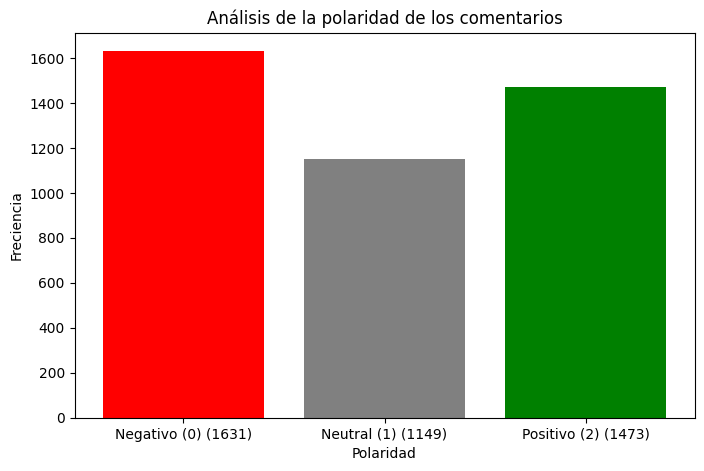

In [6]:
labels = ['Negativo (0)', 'Neutral (1)', 'Positivo (2)']
polarity_counts = data['Polaridad'].value_counts().sort_index()
polarity_counts_sorted = polarity_counts.sort_index()
adjusted_labels = [f'{label} ({count})' for label, count in zip(labels[:len(polarity_counts_sorted)], polarity_counts_sorted)]

plt.figure(figsize=(8, 5))
plt.bar(adjusted_labels, polarity_counts_sorted, color=['red', 'gray', 'green'] [:len(polarity_counts_sorted)])

plt.title('Análisis de la polaridad de los comentarios')
plt.xlabel('Polaridad')
plt.ylabel('Freciencia')
plt.show()


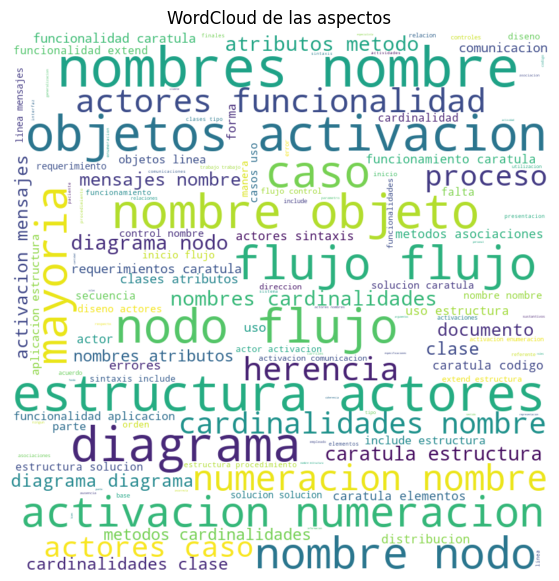

In [7]:
aspectt_text = " ".join(data['Aspecto'])
wordcloud = WordCloud(width=800, height=800, background_color="white").generate(aspectt_text)

plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title("WordCloud de las aspectos")
plt.show()


## Porcesamiento de data

In [11]:
data['Comentario'] = data.apply(lambda row: f"[CLS] {row['Comentario']} [SEP] {row['Aspecto']} [SEP]", axis=1)

In [13]:
data.head()

,Comentario,Aspecto,Polaridad
0,[CLS] la caratula sin errores ortograficos [SE...,caratula,2
1,[CLS] la estructura del documento se visualiza...,estructura,1
2,[CLS] no existen herencias la relacion entre l...,herencias,0
3,[CLS] al existir tantos errores en el procedim...,errores,0
4,[CLS] la caratula sin errores ortograficos [SE...,caratula,2


In [16]:
from sklearn.model_selection import train_test_split

train_data, temp_data = train_test_split(
    data,
    test_size=0.3,
    random_state=42,
    stratify=data['Polaridad']
)

val_data, test_data = train_test_split(
    temp_data,
    test_size=0.5,
    random_state=42,
    stratify=temp_data['Polaridad']
)

print(f"Validation samples: {len(val_data)}")
print(f"Test samples: {len(test_data)}")
print(f"Train samples: {len(train_data)}")


Validation samples: 638
Test samples: 638
Train samples: 2977
